# Exercise Review: Natural language Processing- Exploration

In [3]:
import re

import unicodedata
import nltk
from wordcloud import WordCloud

import os
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from env import get_connection

from prepare import clean, lemmatize, stem

# Spam Data

In [2]:
# Load spam data set
url = get_connection('spam_db')
sql = 'SELECT * FROM spam'
df = pd.read_sql(sql, url, index_col='id')
df.head()

,label,text
id,,
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# Create and explore bigrams for spam data. Visualize them with word cloud. COmpare with ham bigram

In [5]:
ADDITIONAL_STOPWORDS = ['r', 'u', '2', '4', 'ltgt', "'"]

In [6]:
ham_words = lemmatize(clean(' '.join(df[df.label=='ham']['text']), ADDITIONAL_STOPWORDS))
ham_words = list(ham_words.split())
ham_words[:8]

['go', 'jurong', 'point', 'crazy', 'available', 'bugis', 'n', 'great']

In [7]:
spam_words = lemmatize(clean(' '.join(df[df.label=='spam']['text']), ADDITIONAL_STOPWORDS))
spam_words = list(spam_words.split())

all_words = lemmatize(clean(' '.join(df['text']), ADDITIONAL_STOPWORDS))
all_words = list(all_words.split())

In [8]:
def make_ngrams(words, n):
    return pd.Series(nltk.ngrams(words, n)).value_counts().head(20)

In [9]:
#20 most frequent bigrams in the data
top_20_spam_bigrams = make_ngrams(spam_words, 2)
top_20_spam_bigrams.head()

(please, call)         44
(customer, service)    27
(po, box)              24
(a1000, cash)          23
(guaranteed, call)     23
dtype: int64

In [10]:
# sort bygrams from high to low count
top_20_spam_bigrams.sort_values(ascending=False)


(please, call)          44
(customer, service)     27
(po, box)               24
(a1000, cash)           23
(guaranteed, call)      23
(prize, guaranteed)     22
(selected, receive)     19
(send, stop)            19
(await, collection)     19
(every, week)           19
(chance, win)           19
(land, line)            18
(urgent, mobile)        18
(claim, call)           17
(valid, 12hrs)          17
(sae, tc)               16
(account, statement)    16
(prize, claim)          16
(call, 08000930705)     16
(reply, call)           15
dtype: int64

<Axes: >

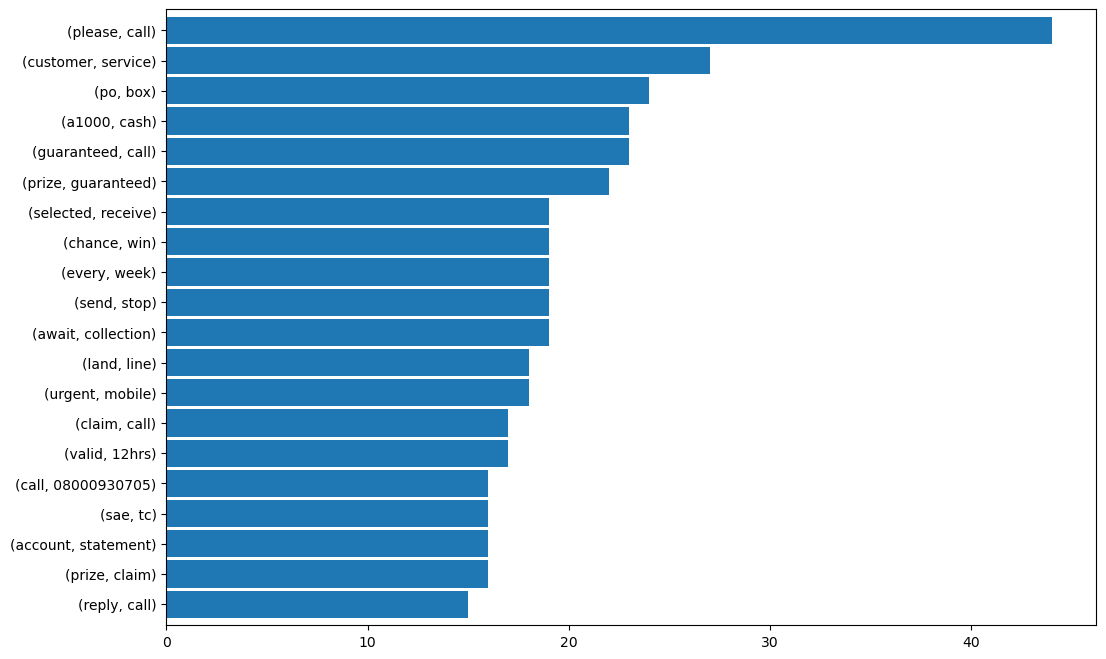

In [11]:

# plot the occurances of the most freq bigrams
top_20_spam_bigrams.sort_values(ascending=True).plot.barh(width=.9, figsize=(12,8))

In [12]:
#to_dict method
top_20_spam_bigrams.to_dict()

{('please', 'call'): 44,
 ('customer', 'service'): 27,
 ('po', 'box'): 24,
 ('a1000', 'cash'): 23,
 ('guaranteed', 'call'): 23,
 ('prize', 'guaranteed'): 22,
 ('chance', 'win'): 19,
 ('every', 'week'): 19,
 ('selected', 'receive'): 19,
 ('send', 'stop'): 19,
 ('await', 'collection'): 19,
 ('land', 'line'): 18,
 ('urgent', 'mobile'): 18,
 ('claim', 'call'): 17,
 ('valid', '12hrs'): 17,
 ('sae', 'tc'): 16,
 ('account', 'statement'): 16,
 ('prize', 'claim'): 16,
 ('call', '08000930705'): 16,
 ('reply', 'call'): 15}

In [13]:
top_20_spam_bigrams

(please, call)          44
(customer, service)     27
(po, box)               24
(a1000, cash)           23
(guaranteed, call)      23
(prize, guaranteed)     22
(chance, win)           19
(every, week)           19
(selected, receive)     19
(send, stop)            19
(await, collection)     19
(land, line)            18
(urgent, mobile)        18
(claim, call)           17
(valid, 12hrs)          17
(sae, tc)               16
(account, statement)    16
(prize, claim)          16
(call, 08000930705)     16
(reply, call)           15
dtype: int64

In [14]:
#output: {modified key name : freq val}
{k[0]+' '+k[1]: v for k, v in top_20_spam_bigrams.to_dict().items()}

{'please call': 44,
 'customer service': 27,
 'po box': 24,
 'a1000 cash': 23,
 'guaranteed call': 23,
 'prize guaranteed': 22,
 'chance win': 19,
 'every week': 19,
 'selected receive': 19,
 'send stop': 19,
 'await collection': 19,
 'land line': 18,
 'urgent mobile': 18,
 'claim call': 17,
 'valid 12hrs': 17,
 'sae tc': 16,
 'account statement': 16,
 'prize claim': 16,
 'call 08000930705': 16,
 'reply call': 15}

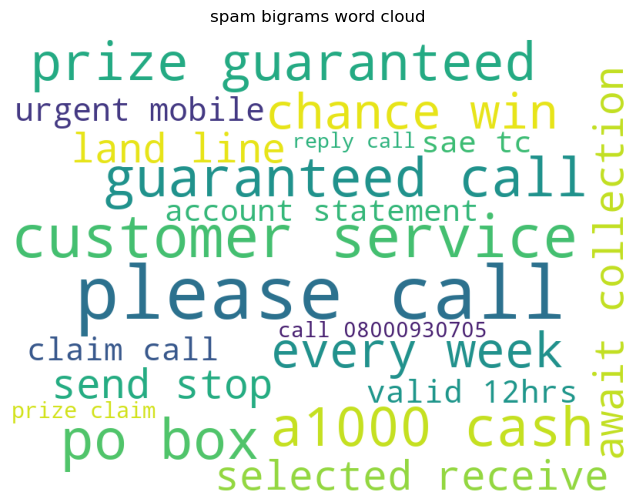

In [15]:
spam_bigram_data = {k[0]+' '+k[1]: v for k, v in top_20_spam_bigrams.to_dict().items()}
spam_bigram_img = WordCloud(background_color="white", width=800, height=600).generate_from_frequencies(spam_bigram_data)

plt.figure(figsize=(10,6))
plt.imshow(spam_bigram_img)
plt.axis("off")
plt.title("spam bigrams word cloud")
plt.show()

In [16]:
def plot_bigrams(words):
    word_data = {k[0]+' '+k[1]: v for k, v in words.to_dict().items()}
    word_img = WordCloud(background_color="white", width=800, height=600).generate_from_frequencies(word_data)
    plt.figure(figsize=(10,6))
    plt.imshow(word_img)
    plt.axis("off")
    plt.show()

In [17]:
top_20_ham_bigrams = make_ngrams(ham_words,2)
top_20_ham_bigrams.head()


(call, later)      52
(let, know)        42
(sorry, call)      38
(good, morning)    31
(new, year)        30
dtype: int64

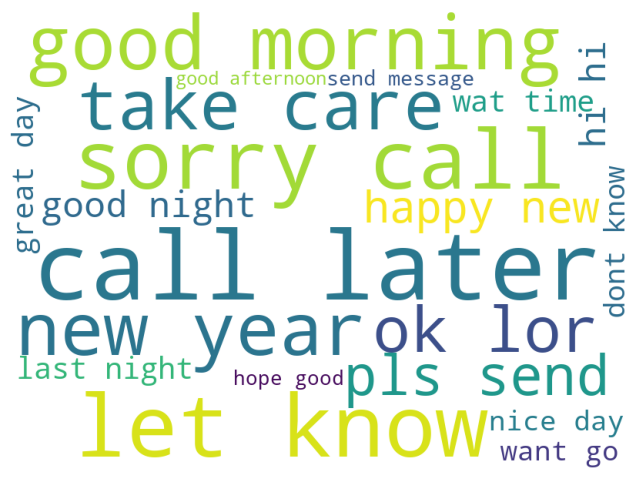

In [18]:
plot_bigrams(top_20_ham_bigrams)

# Is there any overlap in the bigrams for the spam data and ham data?

In [20]:
#create a dict of bigrams & freq for ham 

ham_bigram_data = {k[0]+' '+k[1]: v for k, v in top_20_ham_bigrams.to_dict().items()}
ham_bigram_data

{'call later': 52,
 'let know': 42,
 'sorry call': 38,
 'good morning': 31,
 'new year': 30,
 'take care': 26,
 'ok lor': 22,
 'pls send': 22,
 'happy new': 19,
 'good night': 19,
 'hi hi': 18,
 'last night': 18,
 'wat time': 18,
 'great day': 17,
 'dont know': 16,
 'want go': 15,
 'nice day': 15,
 'send message': 15,
 'hope good': 14,
 'good afternoon': 13}

In [21]:
spam_bigram_data

{'please call': 44,
 'customer service': 27,
 'po box': 24,
 'a1000 cash': 23,
 'guaranteed call': 23,
 'prize guaranteed': 22,
 'chance win': 19,
 'every week': 19,
 'selected receive': 19,
 'send stop': 19,
 'await collection': 19,
 'land line': 18,
 'urgent mobile': 18,
 'claim call': 17,
 'valid 12hrs': 17,
 'sae tc': 16,
 'account statement': 16,
 'prize claim': 16,
 'call 08000930705': 16,
 'reply call': 15}

In [22]:
overlay_list = [bigram for bigram in top_20_spam_bigrams.keys() if bigram in top_20_ham_bigrams.keys()]
overlay_list

[]

# 1d. Create and explore with trigrams (i.e. a n-gram with an n of 3) for both the spam and ham data.

In [24]:
#Create a function to automate the process
def plot_trigrams(words):
    word_data = {k[0] + ' ' + k[1] + ' ' + k[2]: v for k, v in words.to_dict().items()}
    word_img = WordCloud(background_color='white', width=800, height=600).generate_from_frequencies(word_data)
    plt.figure(figsize=(10, 6))
    plt.imshow(word_img)
    plt.axis('off')
    plt.show()

In [25]:
top_20_spam_trigrams = make_ngrams(spam_words, 3)
top_20_spam_trigrams

(prize, guaranteed, call)              21
(call, customer, service)              15
(reply, call, 08000930705)             14
(land, line, claim)                    14
(private, 2003, account)               13
(2003, account, statement)             13
(show, 800, unredeemed)                12
(guaranteed, a1000, cash)              12
(camcorder, reply, call)               12
(every, week, txt)                     11
(please, call, customer)               11
(urgent, trying, contact)              11
(anytime, network, min)                11
(bonus, caller, prize)                 11
(cash, await, collection)              10
(speak, live, operator)                10
(a2000, bonus, caller)                 10
(customer, service, representative)    10
(ur, mob, every)                        9
(nokia, tone, ur)                       9
dtype: int64

<Axes: >

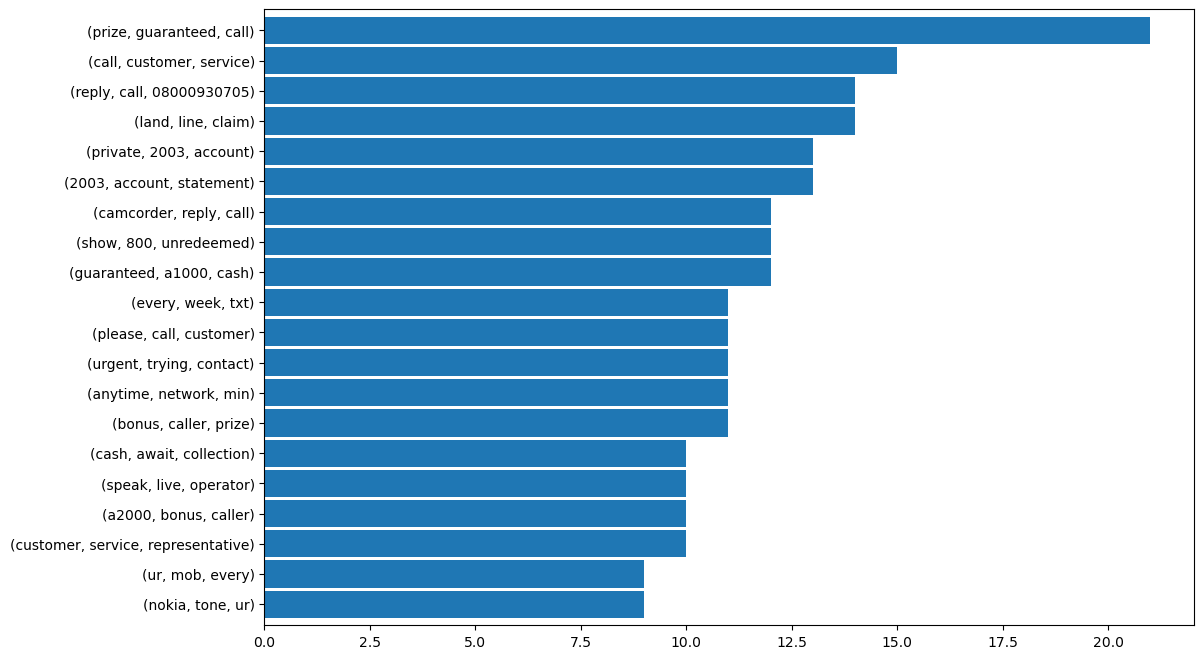

In [26]:
top_20_spam_trigrams.sort_values(ascending=True).plot.barh(width=.9, figsize=(12,8))


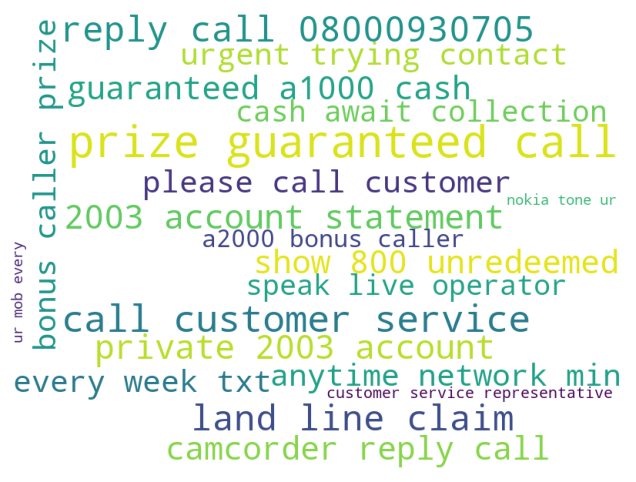

In [27]:
spam_trigram_data = {k[0]+ ' '+k[1]+ ' '+k[2]: v for k,v in top_20_spam_trigrams.to_dict().items()}
spam_trigram_img = WordCloud(background_color='white', width=800, height=600).generate_from_frequencies(spam_trigram_data)
plt.figure(figsize=(10, 6))
plt.imshow(spam_trigram_img)
plt.axis('off')
plt.show()

In [28]:
top_20_ham_trigrams = make_ngrams(ham_words, 3)
top_20_ham_trigrams.head()

(sorry, call, later)    38
(happy, new, year)      19
(pls, send, message)    13
(cant, pick, phone)     12
(pick, phone, right)    12
dtype: int64

<Axes: >

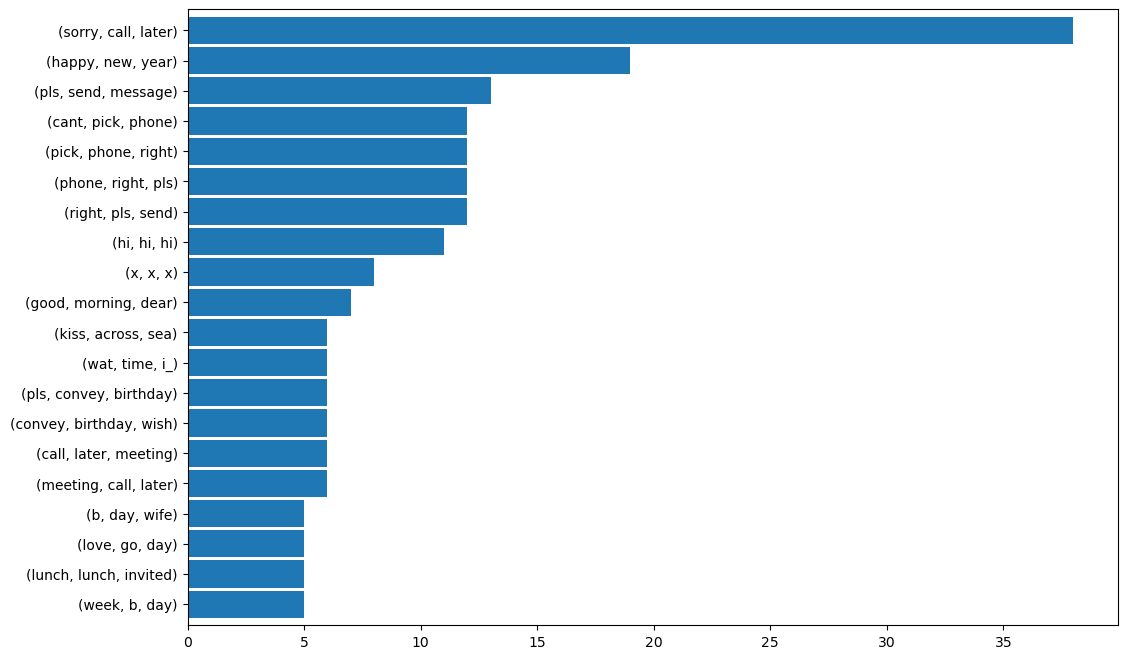

In [29]:
top_20_ham_trigrams.sort_values(ascending=True).plot.barh(width=.9, figsize=(12,8))


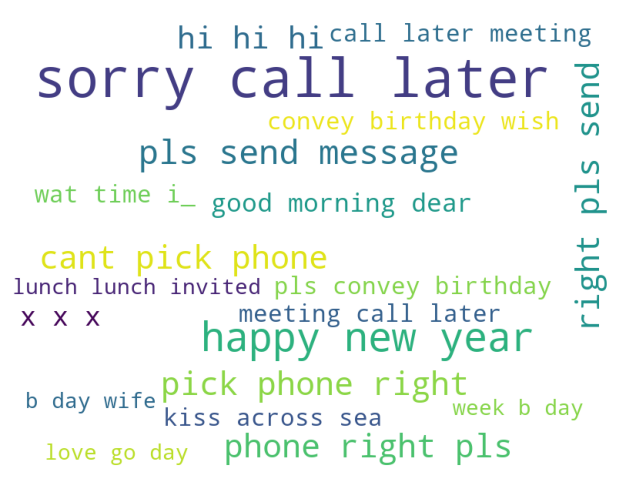

In [30]:
plot_trigrams(top_20_ham_trigrams)


# 2. Explore the blog articles using the techniques discussed in the exploration lesson.

In [32]:
#Read in the clean codeup blog articles
blog_df = pd.read_csv('blog_articles.csv')
blog_df = blog_df.rename(columns={'content':'original'}).drop(columns=['title'])

blog_df['clean'] = blog_df.original.apply(clean, extra_stopwords=ADDITIONAL_STOPWORDS)
blog_df['stem'] = blog_df.clean.apply(stem)
blog_df['lemmatized'] = blog_df.clean.apply(lemmatize)
blog_df

,original,clean,stem,lemmatized
0,May is traditionally known as Asian American a...,may traditionally known asian american pacific...,may tradit known asian american pacif island a...,may traditionally known asian american pacific...
1,Women in tech: Panelist Spotlight – Magdalena ...,women tech panelist spotlight magdalena rahn c...,women tech panelist spotlight magdalena rahn c...,woman tech panelist spotlight magdalena rahn c...
2,Women in tech: Panelist Spotlight – Rachel Rob...,women tech panelist spotlight rachel robbinsma...,women tech panelist spotlight rachel robbinsma...,woman tech panelist spotlight rachel robbinsma...
3,Women in tech: Panelist Spotlight – Sarah Mell...,women tech panelist spotlight sarah mellor cod...,women tech panelist spotlight sarah mellor cod...,woman tech panelist spotlight sarah mellor cod...
4,Women in tech: Panelist Spotlight – Madeleine ...,women tech panelist spotlight madeleine capper...,women tech panelist spotlight madelein capper ...,woman tech panelist spotlight madeleine capper...
5,Black excellence in tech: Panelist Spotlight –...,black excellence tech panelist spotlight wilma...,black excel tech panelist spotlight wilmari de...,black excellence tech panelist spotlight wilma...


In [33]:
#join the words together into one body of text
blog_words = ' '.join(blog_df['lemmatized'])

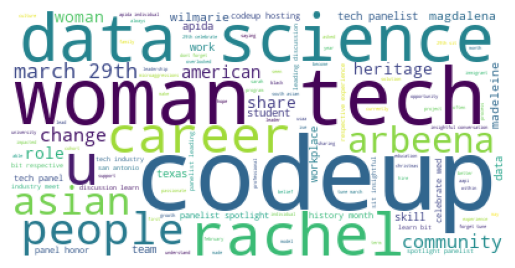

In [34]:
#create a word cloud

blog_img = WordCloud(background_color="white").generate(blog_words)
plt.imshow(blog_img)
plt.axis("off")
plt.show()

In [35]:

# create a list
blog_words = list(blog_words.split())

In [36]:
#create bigrams

top_20_blog_bigrams = make_ngrams(blog_words, 2)
top_20_blog_bigrams.head()

(woman, tech)          12
(data, science)        12
(march, 29th)           8
(industry, meet)        5
(panelist, leading)     5
dtype: int64

<Axes: >

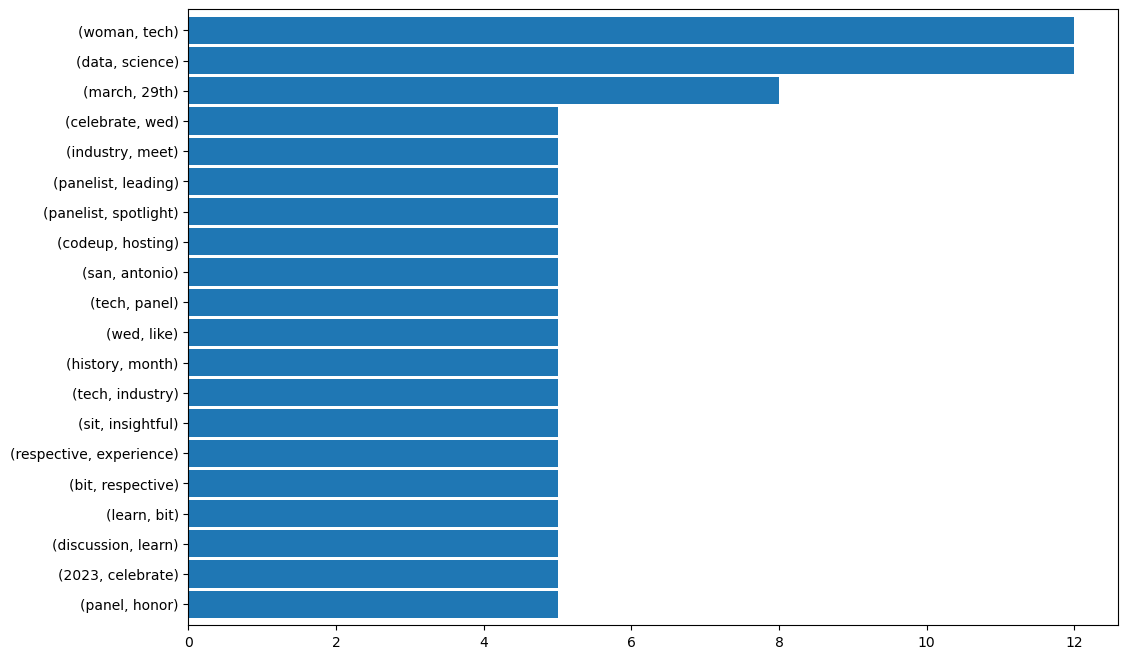

In [37]:
top_20_blog_bigrams.sort_values(ascending=True).plot.barh(width=.9, figsize=(12,8))


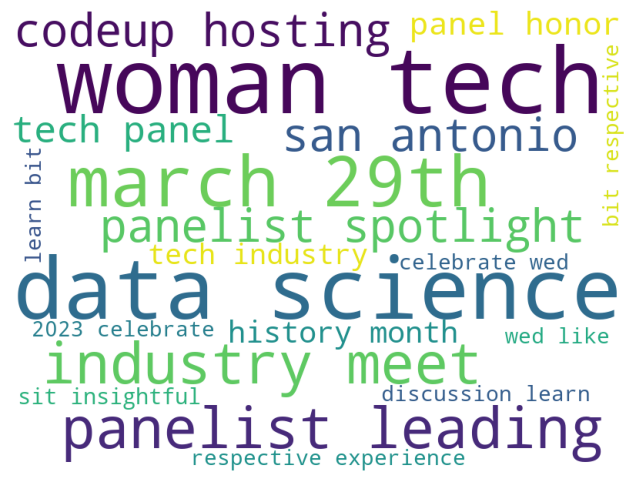

In [38]:
plot_bigrams(top_20_blog_bigrams)


In [39]:
#create trigrams
top_20_blog_trigrams = make_ngrams(blog_words, 3)
top_20_blog_trigrams.head()

(tech, industry, meet)             5
(discussion, learn, bit)           5
(celebrate, wed, like)             5
(2023, celebrate, wed)             5
(sit, insightful, conversation)    5
dtype: int64

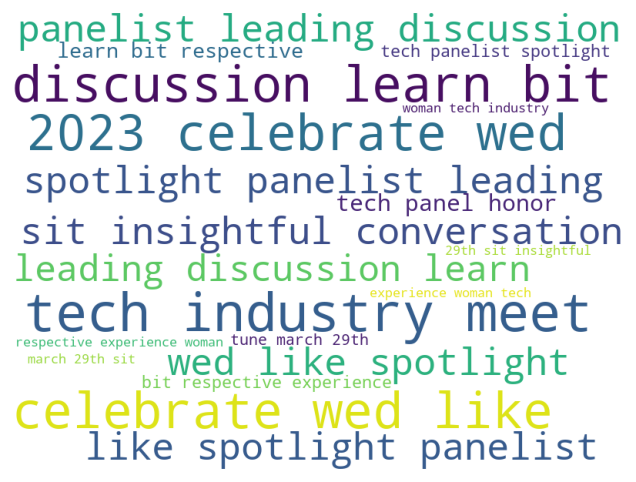

In [40]:
plot_trigrams(top_20_blog_trigrams)


# 3. Explore the news articles using the techniques discussed in the exploration lesson. Use the category variable when exploring.

In [42]:
# acquire
news_df = pd.read_csv('news_articles.csv')
news_df = news_df.rename(columns={'content':'original'}).drop(columns=['title'])

# prepare

news_df['clean'] = news_df.original.apply(clean, extra_stopwords=ADDITIONAL_STOPWORDS)
news_df['stem'] = news_df.clean.apply(stem)
news_df['lemmatized'] = news_df.clean.apply(lemmatize)
news_df.head()

,original,category,clean,stem,lemmatized
0,Microsoft-owned LinkedIn on Monday said it wou...,business,microsoftowned linkedin monday said would lay ...,microsoftown linkedin monday said would lay 66...,microsoftowned linkedin monday said would lay ...
1,Akasa Air CEO Vinay Dube said a notice period ...,business,akasa air ceo vinay dube said notice period si...,akasa air ceo vinay dube said notic period six...,akasa air ceo vinay dube said notice period si...
2,Adani Group has reacted amid allegations of TM...,business,adani group reacted amid allegations tmc mp ma...,adani group react amid alleg tmc mp mahua moit...,adani group reacted amid allegation tmc mp mah...
3,"Brent oil prices steadied above $90 (over ₹7,4...",business,brent oil prices steadied 90 7492 per barrel m...,brent oil price steadi 90 7492 per barrel mond...,brent oil price steadied 90 7492 per barrel mo...
4,The Supreme Court on Monday rejected a request...,business,supreme court monday rejected request telecomm...,suprem court monday reject request telecommun ...,supreme court monday rejected request telecomm...


In [43]:
#create a list of words only found in lemmatized BUSINESS articles
business_words = list(' '.join(news_df[news_df['category'] == 'business']['lemmatized']).split())
business_words[:3]

['microsoftowned', 'linkedin', 'monday']

In [44]:
#Repeat the process for other categories
sports_words = list(' '.join(news_df[news_df['category'] == 'sports']['lemmatized']).split())
technology_words = list(' '.join(news_df[news_df['category'] == 'technology']['lemmatized']).split())
entertainment_words = list(' '.join(news_df[news_df['category'] == 'entertainment']['lemmatized']).split())

In [45]:
# What are the most frequent business words?
business_top_20 = pd.Series(business_words).value_counts().head(20)
business_top_20

said           6
monday         5
job            5
earlier        4
bank           4
pilot          4
group          4
gangwal        3
adani          3
year           3
cut            3
fee            3
month          3
company        3
court          3
hdfc           3
tc             3
report         3
expenditure    3
amid           2
dtype: int64

In [46]:
#Repeat the process for the other categories
sports_top_20 = pd.Series(sports_words).value_counts().head(20)
technology_top_20 = pd.Series(technology_words).value_counts().head(20)
entertainment_top_20 = pd.Series(entertainment_words).value_counts().head(20)

In [47]:
#Compile my most frequent words from each category in one dataframe
top_words = pd.concat([pd.DataFrame(business_top_20).reset_index(),
                       pd.DataFrame(sports_top_20).reset_index(),
                       pd.DataFrame(technology_top_20).reset_index(),
                       pd.DataFrame(entertainment_top_20).reset_index()])

top_words.head()

,index,0
0,said,6
1,monday,5
2,job,5
3,earlier,4
4,bank,4


In [48]:
#Housecleaning
top_words.rename(columns={'index': 'word', 0: 'count'}, inplace=True)
top_words.head()

,word,count
0,said,6
1,monday,5
2,job,5
3,earlier,4
4,bank,4


In [49]:
#Are any words frequently used across multiple subjects?
top_words['word'].value_counts().head(20)


said         4
year         2
added        2
tc           2
company      2
cut          2
job          2
million      1
expert       1
made         1
platform     1
kuch         1
ceasefire    1
around       1
war          1
tata         1
linkedin     1
medium       1
isro         1
io           1
Name: word, dtype: int64

In [50]:
#Many frequently occurring words look business/technology related..
for word in list(business_top_20.index):
    if word in list(technology_top_20.index):
        print('Match found with word: {}!'.format(word))
    else:
        continue

Match found with word: said!
Match found with word: job!
Match found with word: year!
Match found with word: cut!
Match found with word: company!
Match found with word: tc!


In [51]:
#Create bigrams from each category's words
business_bigrams = make_ngrams(business_words, 2)
sports_bigrams = make_ngrams(sports_words, 2)
technology_bigrams = make_ngrams(technology_words, 2)
entertainment_bigrams = make_ngrams(entertainment_words, 2)

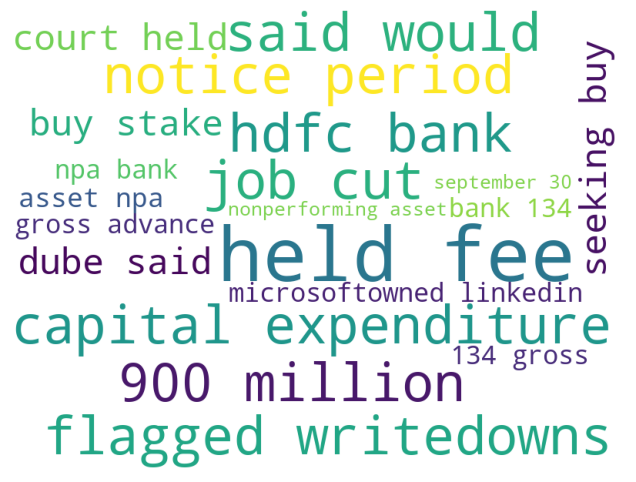

In [52]:
#Plot business
plot_bigrams(business_bigrams)

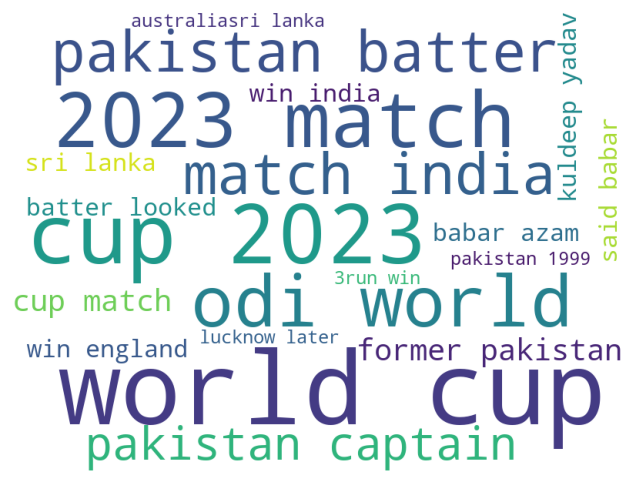

In [53]:
#Plot sports
plot_bigrams(sports_bigrams)

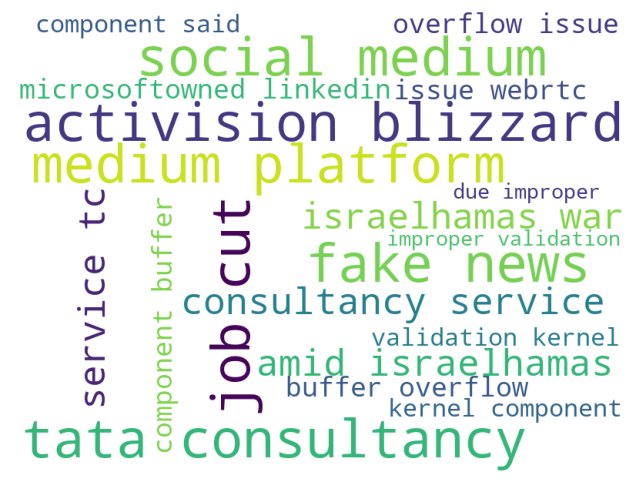

In [54]:
#Plot technology
plot_bigrams(technology_bigrams)

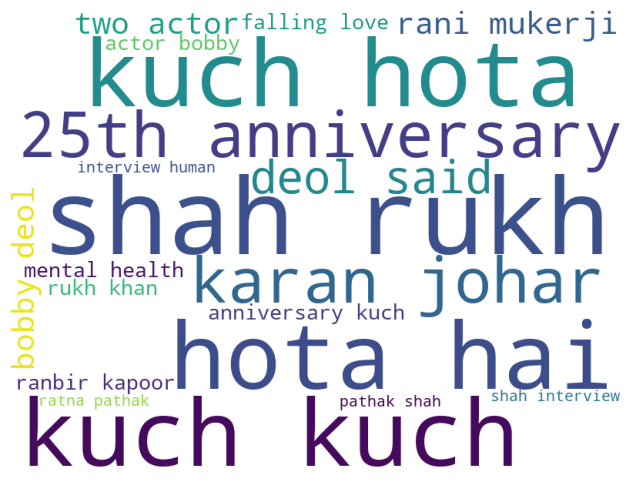

In [55]:

#Plot entertainment
plot_bigrams(entertainment_bigrams)